###adults teens toddlers

In [ ]:
src="/content/drive/My Drive/img data"

In [ ]:
dest="/content/drive/My Drive/destination"

In [ ]:
import os
length = len(os.listdir(src))
tomake=[dest + '/train', dest + '/test']
for i in os.listdir(src):
  tomake.append(dest + f'/train/{i}')
  tomake.append(dest + f'/test/{i}')
len(tomake)

8

In [ ]:
tomake

['/content/drive/My Drive/destination/train',
 '/content/drive/My Drive/destination/test',
 '/content/drive/My Drive/destination/train/toddlers',
 '/content/drive/My Drive/destination/test/toddlers',
 '/content/drive/My Drive/destination/train/adults',
 '/content/drive/My Drive/destination/test/adults',
 '/content/drive/My Drive/destination/train/teens',
 '/content/drive/My Drive/destination/test/teens']

In [ ]:
for directory in tomake:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

#if run again, it'll say failed

/content/drive/My Drive/destination/train created
/content/drive/My Drive/destination/test created
/content/drive/My Drive/destination/train/toddlers created
/content/drive/My Drive/destination/test/toddlers created
/content/drive/My Drive/destination/train/adults created
/content/drive/My Drive/destination/test/adults created
/content/drive/My Drive/destination/train/teens created
/content/drive/My Drive/destination/test/teens created


In [ ]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

In [ ]:
classes=[]
for i in os.listdir(dest + '/train'):
    classes.append(i)
classes = sorted(classes)
len(classes)

3

In [ ]:
source_dir=[]
train_dir=[]
test_dir=[]
for i in classes:
 
  source_dir.append(src + '/' + i + '/')
  train_dir.append(dest + '/train/'+i+'/')
  test_dir.append(dest + '/test/'+i+'/')

print(len(source_dir))
print(len(train_dir))
print(len(test_dir))

3
3
3


In [ ]:
for i in range(0,3):
  split_size = 0.8
  split_data(source_dir[i], train_dir[i], test_dir[i], split_size)

In [ ]:
len(os.listdir('/content/drive/My Drive/img data/adults'))

257

In [ ]:
len(os.listdir('/content/drive/My Drive/destination/test/adults'))

52

In [ ]:
len(os.listdir('/content/drive/My Drive/destination/train/adults'))

205

In [ ]:
#src.adults=257
#dest.train + dest.test=52+205=257

###model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs=32

In [ ]:
np.random.seed(42)
data=ImageDataBunch.from_folder(dest, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

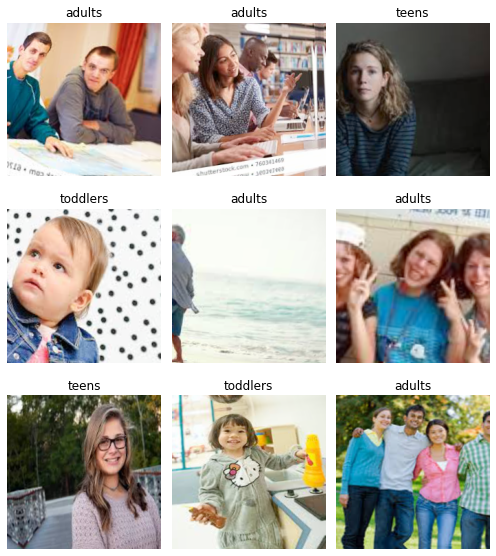

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes

['adults', 'teens', 'toddlers']

In [ ]:
data.c
#no. of classes

3

In [ ]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy)
#pretrained model - resnet50

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.208542,0.797457,0.753555,00:13
1,1.038558,0.853070,0.767772,00:13
2,0.869222,0.700953,0.767772,00:13
3,0.706345,0.645971,0.791469,00:13
4,0.576217,0.608148,0.800948,00:13


In [ ]:
#saving the model
learn.save('/content/drive/My Drive/models/resnet50-stage-1.pth')

###loading model

In [ ]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy).load('/content/drive/My Drive/models/resnet50-stage-1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

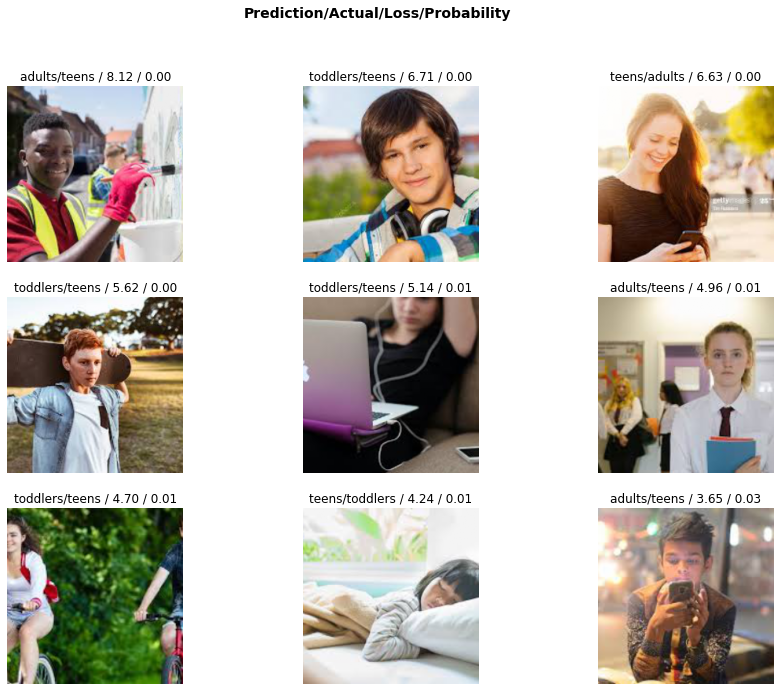

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

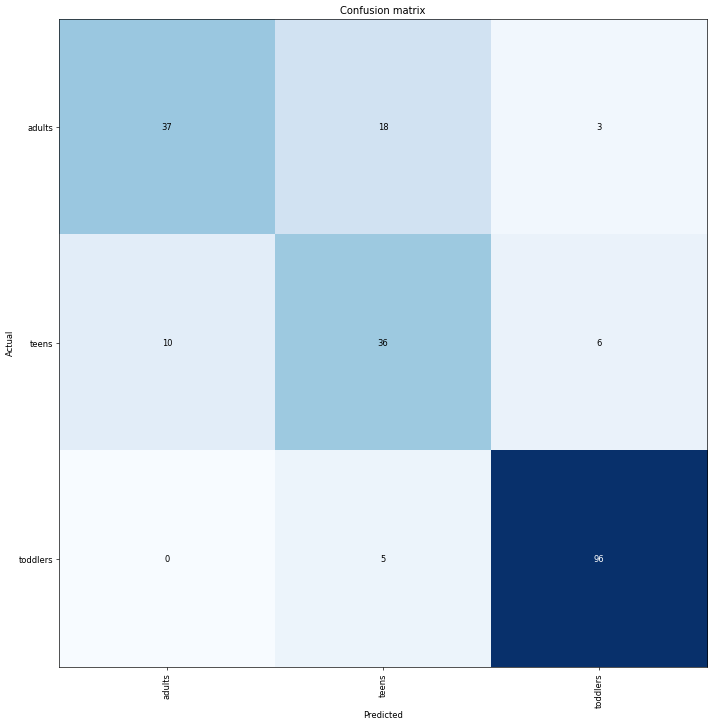

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('adults', 'teens', 18),
 ('teens', 'adults', 10),
 ('teens', 'toddlers', 6),
 ('toddlers', 'teens', 5),
 ('adults', 'toddlers', 3)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.459454,0.654759,0.772512,00:13
1,0.554109,1.424739,0.682464,00:13
2,0.520047,0.786818,0.800948,00:13
3,0.447478,0.599844,0.819905,00:13


In [ ]:
learn.save('/content/drive/My Drive/models/resnet50-stage-2.pth')

In [ ]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy).load('/content/drive/My Drive/models/resnet50-stage-2.pth')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


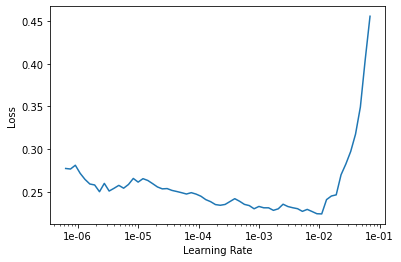

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.255547,0.756326,0.800948,00:12
1,0.297479,0.994637,0.819905,00:13
2,0.276496,0.694114,0.834123,00:12
3,0.260263,0.679207,0.829384,00:12


In [ ]:
  learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.169523,0.706964,0.853081,00:12


In [ ]:
learn.save('/content/drive/My Drive/models/resnet50-stage-3.pth')

In [ ]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy).load('/content/drive/My Drive/models/resnet50-stage-3.pth')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.save('/content/drive/My Drive/destination/models/resnet50-stage-final.pth')

In [ ]:
# learn.recorder.plot()

In [ ]:
# learn.unfreeze()

In [ ]:
# learn.fit_one_cycle(4, max_lr=slice(1e-03,1e-02))

In [ ]:
# learn.fit_one_cycle(1, max_lr=slice(1e-06,1e-05))

In [ ]:
# learn.save('/content/drive/My Drive/destination/models/resnet50-stage-4.pth')
#final model

In [ ]:
# learn.lr_find()

In [ ]:
# learn.recorder.plot()

In [ ]:
# learn.unfreeze()

In [ ]:
# learn=cnn_learner(data,models.resnet50).load('/content/drive/My Drive/models/resnet50-stage-3.pth')
learn.export()

In [ ]:
learn = load_learner("/content/drive/My Drive/destination")

In [ ]:
# image_path="/content/drive/My Drive/Test Data/Img1001.jpg"
# cat, tensor, probs = learn.predict(open_image(image_path))
# print(cat)
# print(tensor)
# print(probs)

# #to check for single image

In [ ]:
import cv2
import glob
ids=[]
predictions=[]
test_data='/content/drive/My Drive/Test_Data'
for img in glob.glob('/content/drive/My Drive/Test_Data/*.jpg'):
  print(img)
  a=img.strip(test_data)
  print(a)
  cat, tensor, probs = learn.predict(open_image(img))
  print(cat.__str__())
  ids.append(a)
  predictions.append(cat.__str__())

/content/drive/My Drive/Test_Data/Img1077.jpg
Img1077.jpg
adults
/content/drive/My Drive/Test_Data/Img1248.jpg
Img1248.jpg
teens
/content/drive/My Drive/Test_Data/Img1038.jpg
Img1038.jpg
adults
/content/drive/My Drive/Test_Data/Img3606.jpg
Img3606.jpg
teens
/content/drive/My Drive/Test_Data/Img1279.jpg
Img1279.jpg
teens
/content/drive/My Drive/Test_Data/Img1382.jpg
Img1382.jpg
teens
/content/drive/My Drive/Test_Data/Img3669.jpg
Img3669.jpg
teens
/content/drive/My Drive/Test_Data/Img5182.jpg
Img5182.jpg
teens
/content/drive/My Drive/Test_Data/Img1071.jpg
Img1071.jpg
teens
/content/drive/My Drive/Test_Data/Img1186.jpg
Img1186.jpg
teens
/content/drive/My Drive/Test_Data/Img1628.jpg
Img1628.jpg
adults
/content/drive/My Drive/Test_Data/Img5128.jpg
Img5128.jpg
teens
/content/drive/My Drive/Test_Data/Img5245.jpg
Img5245.jpg
teens
/content/drive/My Drive/Test_Data/Img5578.jpg
Img5578.jpg
teens
/content/drive/My Drive/Test_Data/Img1444.jpg
Img1444.jpg
adults
/content/drive/My Drive/Test_Data/Im

In [ ]:
import pandas as pd 
f='/content/drive/My Drive/destination/submission.csv'
submission=pd.DataFrame({"Filename":ids,   
                    "Category":predictions}) 
submission.to_csv(f,index=False)